# Human Trafficking and Victim Exploitation

### Import Project libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import graphviz

import warnings
warnings.filterwarnings('ignore')

#!pip install --quiet jupyterlab==1.2 "ipywidgets==7.5"
#!pip install --quiet -U plotly
#!pip install --quiet pycountry_convert
from pycountry_convert import country_alpha2_to_country_name, country_name_to_country_alpha3
import os


%matplotlib inline

### Loading project data
The data used for the project will be obtained in url from https://www.ctdatacollaborative.org

In [2]:
df = pd.read_csv('https://www.ctdatacollaborative.org/sites/default/files/The%20Global%20Dataset%2014%20Apr%202020.csv', dtype = 'object')

# Data Cleaning

### Remove an unrequired index column

In [3]:
df.drop(df.columns[0], axis=1, inplace=True)

### Columns, Row Count and Type

We now have 63 different columns and some missing data in across the columns

### Show the DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48801 entries, 0 to 48800
Data columns (total 63 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   yearOfRegistration                      48801 non-null  object
 1   Datasource                              48801 non-null  object
 2   gender                                  48801 non-null  object
 3   ageBroad                                48801 non-null  object
 4   majorityStatus                          48801 non-null  object
 5   majorityStatusAtExploit                 48801 non-null  object
 6   majorityEntry                           48801 non-null  object
 7   citizenship                             48801 non-null  object
 8   meansOfControlDebtBondage               48801 non-null  object
 9   meansOfControlTakesEarnings             48801 non-null  object
 10  meansOfControlRestrictsFinancialAccess  48801 non-null  object
 11  me

### Let's check our data again
This is the new DataFrame. Notice that the original index colums has been dropped, and we now have 63 columns left from the original 64 columns

In [5]:
df.head()

,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,...,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
1,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
2,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
3,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
4,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1


### Lets's handle missing values

In [6]:
df.replace('-99', np.nan, inplace=True)
df.replace(-99, np.nan, inplace=True)
df.replace('00', np.nan, inplace=True)

# Exploratory Data Analysis

Lets go ahead and look at what is hidden insde the data.

### To See columns in the DataFrame

We can extract all column information by using include='all' parameter. Otherwise it would be just non-object columns.

In [7]:
df.describe(include='all')

,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,...,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
count,48801,48801,48801,36439,36439,9290,6491,39665,2496,3997,...,5215,4589,16371,18120,37782,39994,39994,39994,39994,48724
unique,18,2,2,9,2,2,2,44,2,2,...,2,3,2,20,58,2,2,2,2,2
top,2016,Case Management,Female,9--17,Adult,Minor,Adult,PH,1,1,...,0,Prostitution,0,Not Specified,US,0,0,0,0,1
freq,16399,36289,35534,8645,26238,7044,5438,11365,1281,2776,...,5172,4386,16332,8730,12512,38369,37898,38115,35514,39207


### In what year was most cases recorded?

###### We see that most cases were recorded in the year 2016

In [8]:
df['yearOfRegistration'].value_counts()

2016    16399
2017     6508
2018     5818
2015     4276
2014     3000
2013     1832
2005     1455
2006     1423
2007     1417
2012     1367
2011     1340
2002     1026
2010      943
2008      802
2009      587
2003      357
2004      223
2019       28
Name: yearOfRegistration, dtype: int64

### What types of sexual Exploitation were forced on the victims?

In [9]:
gh=df.typeOfSexConcatenated.unique()
df_sample=pd.DataFrame(gh)
udf_sample = df_sample.drop(0)
udf_sample

,0
1,Prostitution
2,Pornography
3,Private sexual services


### Which types of Victim Exploitation Practiced

In [16]:
explo=df.typeOfExploitConcatenated.unique()
df_sample=pd.DataFrame(explo)
udf_sample = df_sample.drop(1)
udf_sample

,0
0,Sexual exploitation
2,Forced labour
3,Other
4,Forced labour;Other
5,Slavery and similar practices
6,Forced marriage
7,Forced labour;Sexual exploitation;Combined sex...


### In What forced labour occupations were victims engaged?

In [11]:
explo=df.typeOfLabourConcatenated.unique()
df_sample=pd.DataFrame(explo)
udf_sample = df_sample.drop(0)
udf_sample


,0
1,Not specified
2,Other;Not specified
3,Hospitality
4,Domestic work
5,Domestic work;Not specified
6,Begging
7,Agriculture
8,Construction
9,Manufacturing
10,Construction;Not specified


### How many Victims reported themselves as abducted?

In [14]:
df.isAbduction.count()

16371

### In Which Countries were Victims Exploited

In [15]:
df.CountryOfExploitation.unique()
df_sample=pd.DataFrame(explo)
udf_sample = df_sample.drop(0)
udf_sample



,0
1,Not specified
2,Other;Not specified
3,Hospitality
4,Domestic work
5,Domestic work;Not specified
6,Begging
7,Agriculture
8,Construction
9,Manufacturing
10,Construction;Not specified


### Countries in the Dataset

What we've got here:

There are 48801 data.
We have 44 identified countries.
There are 63 different questions asked, and their responses.
Let's take a look at these countries.

Alpha-2 codes of Countries

In [17]:
df.citizenship.unique()

array(['CO', 'MD', 'RO', 'UA', 'BY', 'GH', 'AL', 'BG', 'UZ', 'ID', 'TJ',
       'CD', 'ML', 'GW', 'CI', 'SN', 'SL', 'KG', 'GN', 'KH', 'LA', 'KZ',
       'TM', 'BF', 'NE', 'HT', 'LK', 'BO', 'MM', 'AF', 'UG', 'ER', 'NG',
       'NP', 'PH', 'BD', nan, 'US', 'TH', 'KR', 'VN', 'KE', 'CN', 'MX',
       'MG'], dtype=object)

### How was the dataset information acquire?

In [18]:
df['Datasource'].unique().tolist()

['Case Management', 'Hotline']

### What number of Trafficked Victims are of unknown Citizenship

The number of Trafficked Victims of unknown Citizenship are 9136, representing 18.72% of the sample size

In [19]:
print('Trafficked Victims of unknown Citizenship are:\n')
nullNumb = len(df[df.citizenship.isnull()])
print(str(nullNumb) +' ({:.2%})'.format(nullNumb / len(df)))

Trafficked Victims of unknown Citizenship are:

9136 (18.72%)


### What number of Victims were exploited in Unknown Countries

###### At the same time, number of Trafficked Victims of country of exploitation are 11019 persons. They made up 22.58% of our data sample size

In [20]:
num_null = len(df[df.CountryOfExploitation.isnull()])
print(str(num_null) + " ({:.2%})".format(num_null / len(df)))

11019 (22.58%)


### Victims Gender Distribution.

The measurement of  gender distribution among identified victims suggests that females victims are in the majority at 35534 or 72.8141 percent, while male victims represents 13267 of the sample size or 27.1859 percent. 

In [21]:
df.gender.value_counts()

Female    35534
Male      13267
Name: gender, dtype: int64

### Number of reported cases by Country

In [22]:
df.citizenship.value_counts().sort_values(ascending=False)

PH    11365
UA     7761
MD     5901
US     3636
KH     1979
ID     1971
BY     1463
MM     1250
RO      655
GH      544
KG      437
BG      342
HT      339
UZ      261
VN      170
GW      145
LA      126
CO      124
NG      108
UG       98
AF       97
MG       94
LK       85
SL       81
SN       70
TH       55
KZ       54
CD       53
ML       45
TJ       43
BF       33
KE       32
CI       31
NE       31
NP       27
TM       26
CN       23
AL       22
MX       19
BO       18
GN       15
ER       13
KR       12
BD       11
Name: citizenship, dtype: int64

### Victims Age and Gender Distribution.

The folllowing values represent the sum victims age group classified by gender. We continue to observe that more females are trafficked over time and in this gender group, the most trafficked age range are 09--17 year olds, and 30--38 for males.

In [23]:
dFage = df.groupby(['gender', 'ageBroad']).size().reset_index()
dFage.rename(columns={0: 'Number of Trafficked Individuals'}, inplace=True)
print(dFage)

display('Age and Gender distribution of Trafficked persons')


    gender ageBroad  Number of Trafficked Individuals
0   Female     0--8                               841
1   Female   18--20                              4227
2   Female   21--23                              3734
3   Female   24--26                              2816
4   Female   27--29                              1869
5   Female   30--38                              4222
6   Female   39--47                              1366
7   Female      48+                               865
8   Female    9--17                              6754
9     Male     0--8                               715
10    Male   18--20                               221
11    Male   21--23                               479
12    Male   24--26                               648
13    Male   27--29                               772
14    Male   30--38                              2869
15    Male   39--47                              1455
16    Male      48+                               695
17    Male    9--17         

'Age and Gender distribution of Trafficked persons'

### Cumulative Victims Age Distribution

This is a sum of all victims grouped by their age range. Again, we see clearly that The most trafficked age groups are 9--17  followed by 30--38  .

In [24]:
df.loc[df.ageBroad == '0--8', 'ageBroad'] = '00--08'
df.loc[df.ageBroad == '9--17', 'ageBroad'] = '09--17'
ageDist=df.ageBroad.value_counts().sort_index()

ageDist


00--08    1556
09--17    8645
18--20    4448
21--23    4213
24--26    3464
27--29    2641
30--38    7091
39--47    2821
48+       1560
Name: ageBroad, dtype: int64

# Visualization

The Following barplot shows that females are disproportionately trafficked and exploitated than males. For the most part, they are exploited in the sex trade, household labour etc. A number also end up as unwilling organ donors as we will learn as we progress.

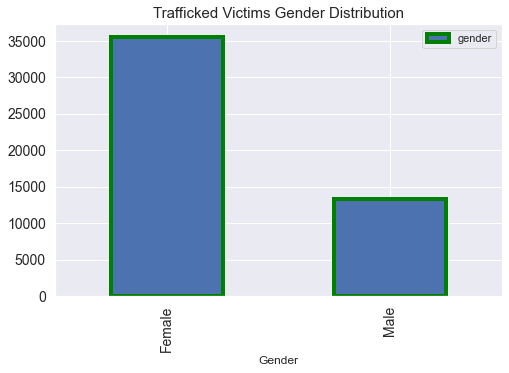

In [25]:
plt.figure(figsize=(8, 5))
nonNan=df.gender.value_counts().plot(kind='bar', fontsize=14, edgecolor='green', linewidth=4)
plt.title('Trafficked Victims Gender Distribution', fontsize=15)
plt.xlabel('Gender')
plt.legend(loc='upper right')

plt.show()

#plt.savefig("bar_plot.png")

In [ ]:
dFage = df.groupby(['gender', 'ageBroad']).size().reset_index()
dFage.rename(columns={0: 'Trafficked Persons'},
             inplace=True)  # Number of Trafficked Individuals

fig = px.bar(dFage, x='ageBroad', y='Trafficked Persons', color='gender',title='Victims Age and Gender Distribution', height=600, width=800,
             category_orders={'ageBroad': ['0--8', '9--17', '18--20', '21--23', '24--26', '27--29', '30--38', '39--47', '48+']})
fig.show()

### Here, we see a near 75 percentage gender skew ratio

### Gender and Age of Victims

In [37]:
dFage = df.groupby(['gender', 'ageBroad']).size().reset_index()
dFage.rename(columns={0: 'Trafficked Persons'},
             inplace=True)  # Number of Trafficked Individuals

fig = px.bar(dFage, x='ageBroad', y='Trafficked Persons', color='gender',title='Victims Age and Gender Distribution', height=400, width=550,
             category_orders={'ageBroad': ['0--8', '9--17', '18--20', '21--23', '24--26', '27--29', '30--38', '39--47', '48+']})
fig.show()

### Human trafficking development over time

###### The following graph shows the time development of trafficking in Humans  between 2003 and 2018. We continue to observe the incremental lopsidedness in victims population against females plateauing in 2018. Conversely, the male graph plateaued two years earlier in 2016.

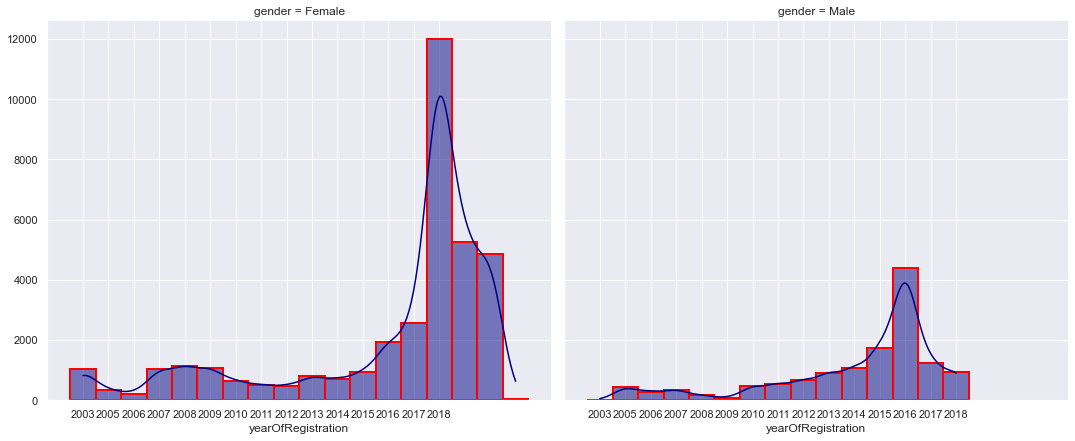

In [39]:
sns.set_theme()

df_1 = sns.FacetGrid(df, col='gender', height=6.29, aspect=1.2)
df_1.map(sns.histplot, 'yearOfRegistration', kde = True, color='navy', edgecolor='red', linewidth=2)

#df_1.savefig('facet_plot1.png')

### Victims age range and Gender Disparity

Text(0, 0.5, 'Victim Count')

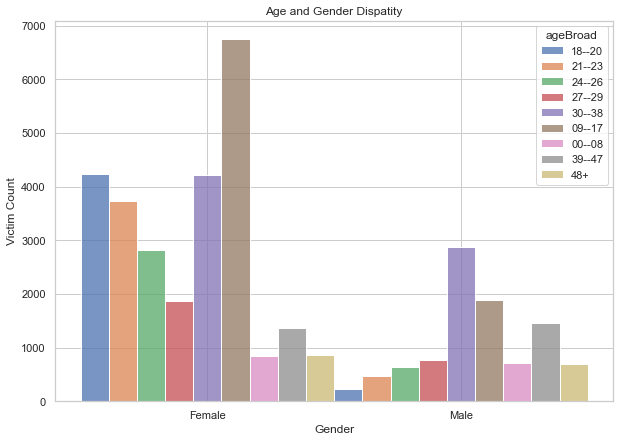

In [40]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 7))
sns.histplot(df, x='gender', hue='ageBroad', multiple='dodge')
plt.title('Age and Gender Dispatity')
plt.xlabel('Gender')
plt.ylabel('Victim Count')

### Gender and Age of Victims

In [43]:
fig = px.pie(dFage.groupby('gender').sum().reset_index(),
             values='Trafficked Persons',
             names='gender',
             title='Victims Gender Distribution',
             height=550,
             width=700)

fig.show()


# Countries of Exploitation

In [44]:

#num_null = len(df[df.CountryOfExploitation.isnull()])
#print(str(num_null) +" ({:.2%})".format(num_null / len(df)))


df_destination = df.copy()
df_destination.dropna(subset = ['CountryOfExploitation'], inplace=True)
df_destination['destination_iso3'] = df_destination['CountryOfExploitation'].apply(lambda x: country_name_to_country_alpha3
                                                                                   (country_alpha2_to_country_name(x)))
df_destination['destination_name'] = df_destination['CountryOfExploitation'].apply(lambda x: country_alpha2_to_country_name(x))

df_wmap = pd.DataFrame(df_destination.groupby(['destination_iso3', 'destination_name']).size()).reset_index()
df_wmap.rename(columns = {0:'Number of Victims'}, inplace=True)

fig = px.choropleth(df_wmap, locations='destination_iso3',
                    color='Number of Victims',
                    hover_name='destination_name',
                    title = 'Reported Countries of Exploitation and Victims Count',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

### Victims Ages when trafficked

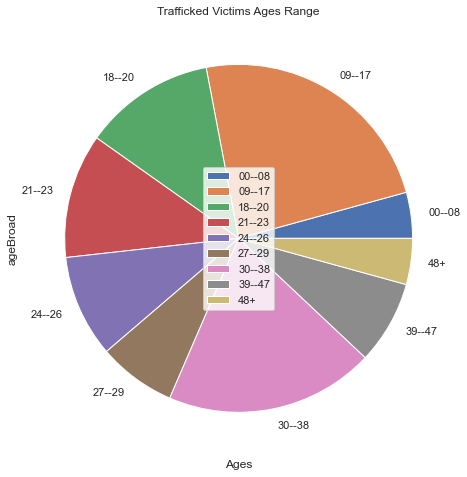

<Figure size 1008x864 with 0 Axes>

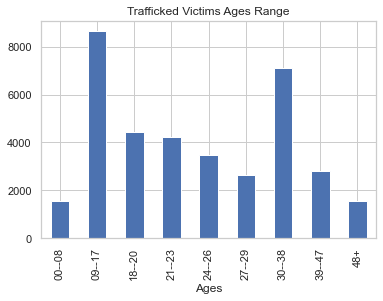

In [103]:
df.loc[df.ageBroad == '0--8', 'ageBroad'] = '00--08'
df.loc[df.ageBroad == '9--17', 'ageBroad'] = '09--17'

#plt.figure()
plt.figure(figsize=(12, 8))
df.ageBroad.value_counts().sort_index().plot(kind='pie')
plt.title('Trafficked Victims Ages Range')
plt.xlabel('Ages')
 
plt.legend(loc='center')

plt.show()

plt.figure(figsize=(14, 12))
df.loc[df.ageBroad == '0--8', 'ageBroad'] = '00--08'
df.loc[df.ageBroad == '9--17', 'ageBroad'] = '09--17'
plt.figure()
df.ageBroad.value_counts().sort_index().plot(kind='bar')
plt.title('Trafficked Victims Ages Range')
plt.xlabel('Ages')

plt.show()


### Victims Destination and Exploitation Countries

In [45]:
gf = sns.light_palette('blue', as_cmap=True)
pvTable = pd.pivot_table(df,
                         values='citizenship',
                         index='yearOfRegistration',
                         columns= 'CountryOfExploitation',
                         aggfunc='count',
                         fill_value=0)
pvTable.style.background_gradient(cmap=gf)

CountryOfExploitation,AE,AF,AL,AR,AT,BA,BD,BG,BH,BY,CN,CY,CZ,DK,EC,EG,GH,HK,HT,ID,IN,IT,JO,JP,KH,KW,KZ,LB,LY,MD,MG,MK,MU,MY,OM,PH,PL,QA,RO,RS,RU,SA,SG,SL,SN,SY,TH,TJ,TM,TR,TT,TW,UA,UG,US,UZ,VN,ZA
yearOfRegistration,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002,0,0,0,0,0,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,175,0,0,0,0,0,0,0,248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2003,0,0,0,0,0,86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2004,11,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,140,0,0,0,0,0,0,0,0,0,0,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2005,54,0,22,0,0,0,0,130,0,0,0,0,0,0,0,0,514,0,0,0,0,12,0,0,0,0,0,0,0,196,0,0,0,11,0,0,0,0,113,0,234,0,0,0,0,0,0,11,0,80,0,0,0,0,0,78,0,0
2006,32,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,30,0,0,21,0,0,0,0,0,0,0,0,0,265,0,0,0,370,0,0,136,0,109,0,383,0,0,0,0,0,0,0,0,63,0,0,0,0,0,0,0,0
2007,68,0,0,0,24,0,0,226,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,292,0,0,0,106,0,0,86,0,37,0,231,0,0,0,149,0,0,0,0,54,0,0,67,53,0,0,0,0
2008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,11,0,0,241,0,0,0,0,0,0,0,0,0,0,11,0,0,65,27,0,0,0,0,0,0,0,435,0,0,0,0,0
2009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,282,0,0,0,0,0,0,0,0,0,0,39,0,0,0,0,0,0,0,0,0,0,0,266,0,0,0,0,0
2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,58,0,0,13,0,0,0,0,0,0,37,0,0,0,180,0,0,0,194,0,178,0,15,0,0,0,244,0,0,0,0,0


### Victim Demographics breakdown

In [46]:
df['Victims'] = 1
fig = px.sunburst(df[df.ageBroad.notna()], path=['gender', 'ageBroad'], values='Victims', color='gender',
                  title='Gender and Age of Human Trafficking Victims')
fig.update_layout(width=600, height=600)
fig.show()

### Total Number of Origin Countries Analyzed

In [94]:
df.loc[:, 'citizenship'].nunique()

44

### Machine Learning

Clean up the data for analysis.
The target is to determine the type of exploration.
correlateted features were removed.

In [47]:
'''df2 = df.copy()                                                # still requires work
df2 = df2.loc[df.yearOfRegistration > 2016
df2 = df2.drop(['meansOfControlConcatenated',
                    'isForcedLabour',
                    'isSexualExploit',
                    'isOtherExploit',
                    'isSexAndLabour',
                    'isForcedMarriage',
                    'isForcedMilitary',
                    'isOrganRemoval',
                    'typeOfLabourAgriculture',
                    'typeOfLabourAquafarming',
                    'typeOfLabourBegging',
                    'typeOfLabourConstruction',
                    'typeOfLabourDomesticWork',
                    'typeOfLabourHospitality',
                    'typeOfLabourIllicitActivities',
                    'typeOfLabourManufacturing',
                    'typeOfLabourMiningOrDrilling',
                    'typeOfLabourPeddling',
                    'typeOfLabourTransportation',
                    'typeOfLabourOther',
                    'typeOfLabourNotSpecified',
                    'typeOfLabourConcatenated',
                    'typeOfSexProstitution',
                    'typeOfSexPornography',
                    'typeOfSexRemoteInteractiveServices',
                    'typeOfSexPrivateSexualServices',
                    'typeOfSexConcatenated'], axis=1)

df2.shape

for column in ctdc2.columns:
    if ctdc2[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        ctdc2[column] = le.fit_transform(ctdc2[column])

ctdc_target = ctdc2['typeOfExploitConcatenated']
target_labels = ['Forced Labour', 'Forced Marriage', 'Forced Military',
                 'Organ Removal', 'Other Exploit', 'Sex and Labour',
                 'Sexual Exploit']
ctdc3 = ctdc2.copy()
ctdc3 = ctdc3.drop(['typeOfExploitConcatenated'], axis=1)
X = ctdc3
y = ctdc_target
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=3)
decision_tree = decision_tree.fit(X, y)

tree_data = tree.export_graphviz(decision_tree, out_file=None,
                                 feature_names=ctdc3.columns,
                                 class_names=target_labels,
                                 filled=True, rounded=True,
                                 special_characters=True)
graph = graphviz.Source(tree_data)
graph.render("CTDC Decision Tree", view=True)'''


'df2 = df.copy()                                                # still requires work\ndf2 = df2.loc[df.yearOfRegistration > 2016\ndf2 = df2.drop([\'meansOfControlConcatenated\',\n                    \'isForcedLabour\',\n                    \'isSexualExploit\',\n                    \'isOtherExploit\',\n                    \'isSexAndLabour\',\n                    \'isForcedMarriage\',\n                    \'isForcedMilitary\',\n                    \'isOrganRemoval\',\n                    \'typeOfLabourAgriculture\',\n                    \'typeOfLabourAquafarming\',\n                    \'typeOfLabourBegging\',\n                    \'typeOfLabourConstruction\',\n                    \'typeOfLabourDomesticWork\',\n                    \'typeOfLabourHospitality\',\n                    \'typeOfLabourIllicitActivities\',\n                    \'typeOfLabourManufacturing\',\n                    \'typeOfLabourMiningOrDrilling\',\n                    \'typeOfLabourPeddling\',\n                    

#pd.set_option("display.max_rows", None, "display.max_columns", None)
